
📊 ANALYZING ALL DATASETS

==================== TRAINING SET ====================
🔍 Analyzing dataset: Training Set
📁 File path: ./train.json
------------------------------------------------------------
✓ Successfully loaded dataset from: ./train.json
📊 TRAINING SET ANALYSIS SUMMARY

📈 BASIC STATISTICS:
  Total samples: 96
  Total label instances: 527
  Unique labels found: 21
  Expected labels: 21
  Average labels per sample: 5.49
  Min labels per sample: 1
  Max labels per sample: 13

🔍 MISSING LABELS:
  ✓ All expected labels are present!

📊 LABEL FREQUENCY ANALYSIS:
  Label           Count    Samples  %       
  --------------- -------- -------- --------
  NACHNAME        93       93       96.9    %
  VORNAME         88       88       91.7    %
  STRASSE         42       42       43.8    %
  WOHNORT         40       40       41.7    %
  POSTLEITZAHL    40       40       41.7    %
  HAUSNUMMER      40       40       41.7    %
  VERTRAGSNUMMER  36       36       37.5    %
  DATUM     

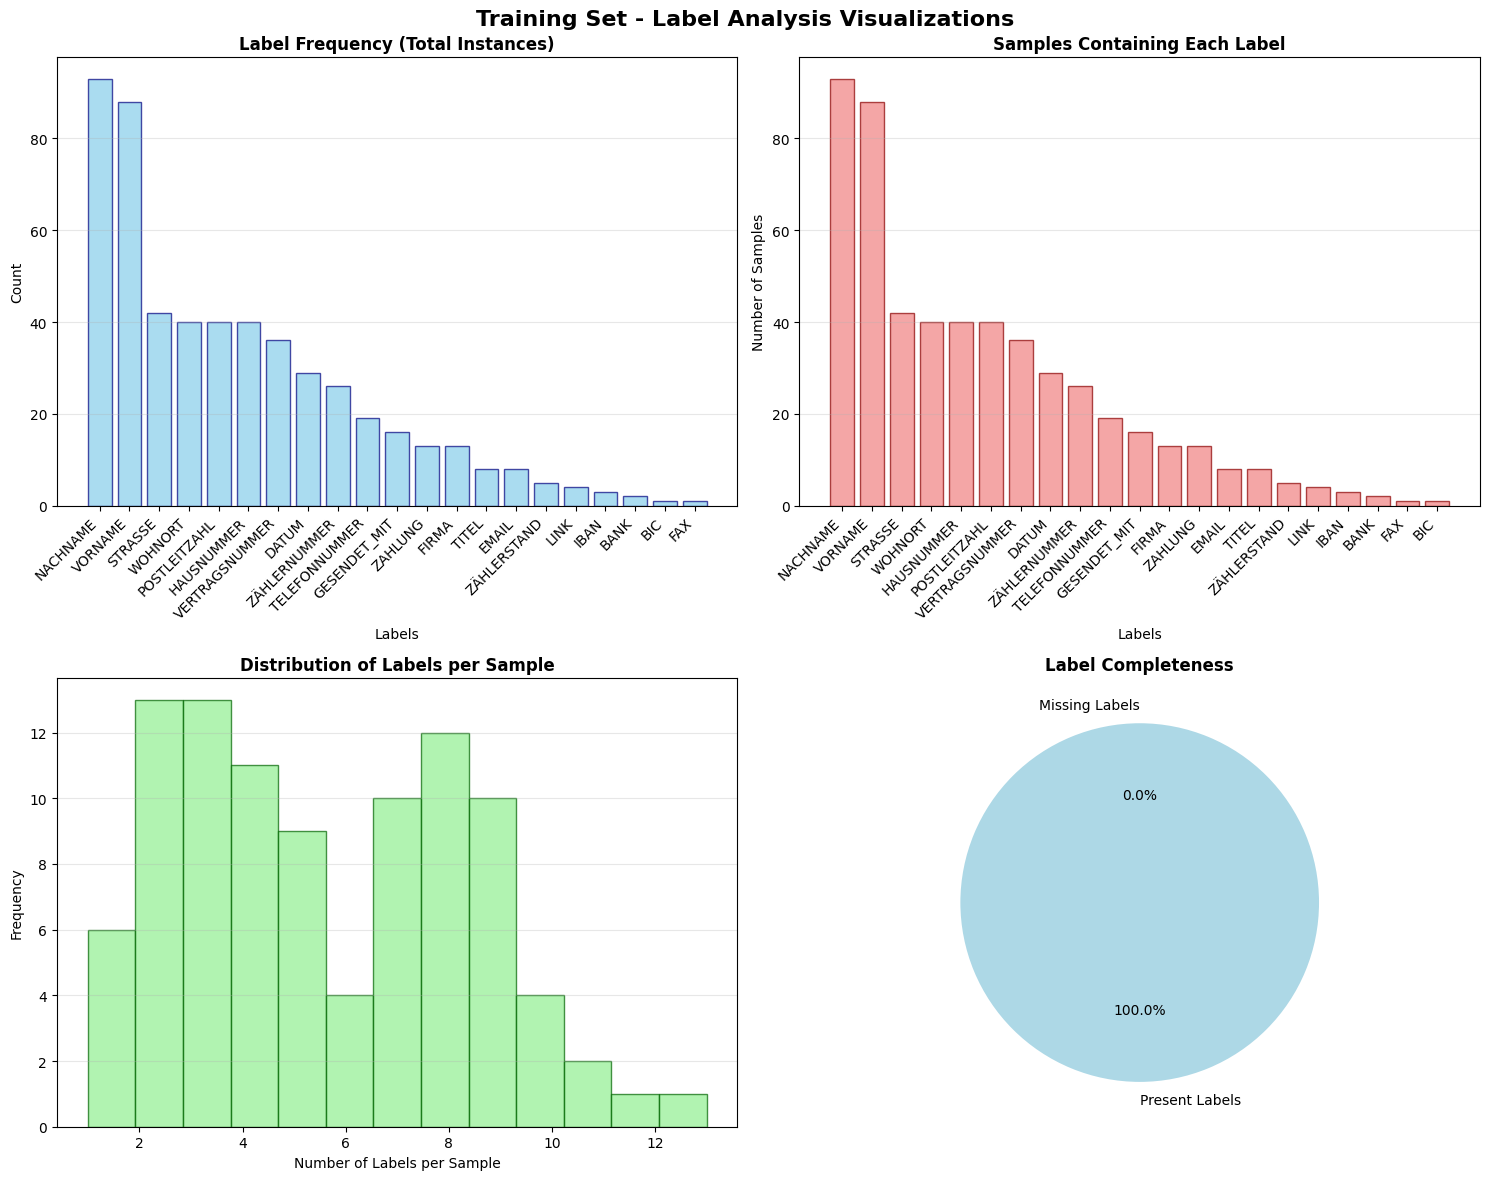


📋 DETAILED LABEL STATISTICS:
         Label  Status  Total_Instances  Samples_With_Label  Percentage_of_Samples
      NACHNAME Present               93                  93                  96.88
       VORNAME Present               88                  88                  91.67
       STRASSE Present               42                  42                  43.75
       WOHNORT Present               40                  40                  41.67
    HAUSNUMMER Present               40                  40                  41.67
  POSTLEITZAHL Present               40                  40                  41.67
VERTRAGSNUMMER Present               36                  36                  37.50
         DATUM Present               29                  29                  30.21
  ZÄHLERNUMMER Present               26                  26                  27.08
 TELEFONNUMMER Present               19                  19                  19.79
  GESENDET_MIT Present               16                  

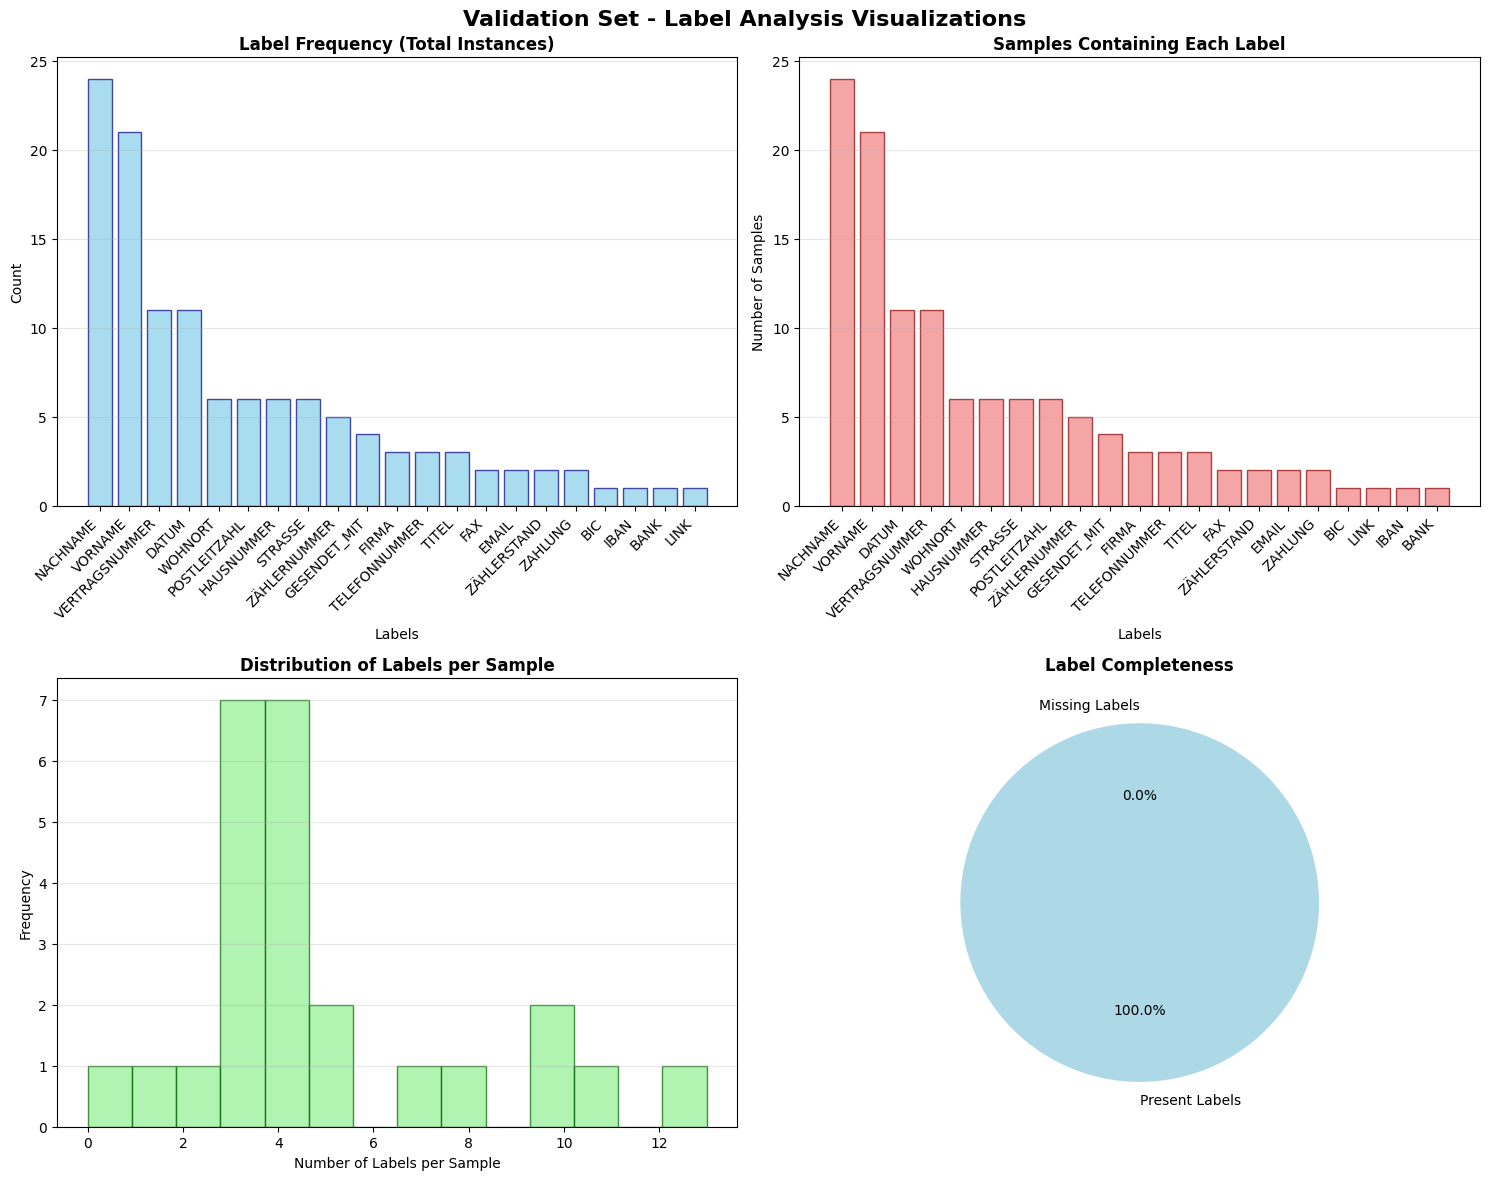


📋 DETAILED LABEL STATISTICS:
         Label  Status  Total_Instances  Samples_With_Label  Percentage_of_Samples
      NACHNAME Present               24                  24                   96.0
       VORNAME Present               21                  21                   84.0
VERTRAGSNUMMER Present               11                  11                   44.0
         DATUM Present               11                  11                   44.0
  POSTLEITZAHL Present                6                   6                   24.0
       STRASSE Present                6                   6                   24.0
       WOHNORT Present                6                   6                   24.0
    HAUSNUMMER Present                6                   6                   24.0
  ZÄHLERNUMMER Present                5                   5                   20.0
  GESENDET_MIT Present                4                   4                   16.0
 TELEFONNUMMER Present                3                  

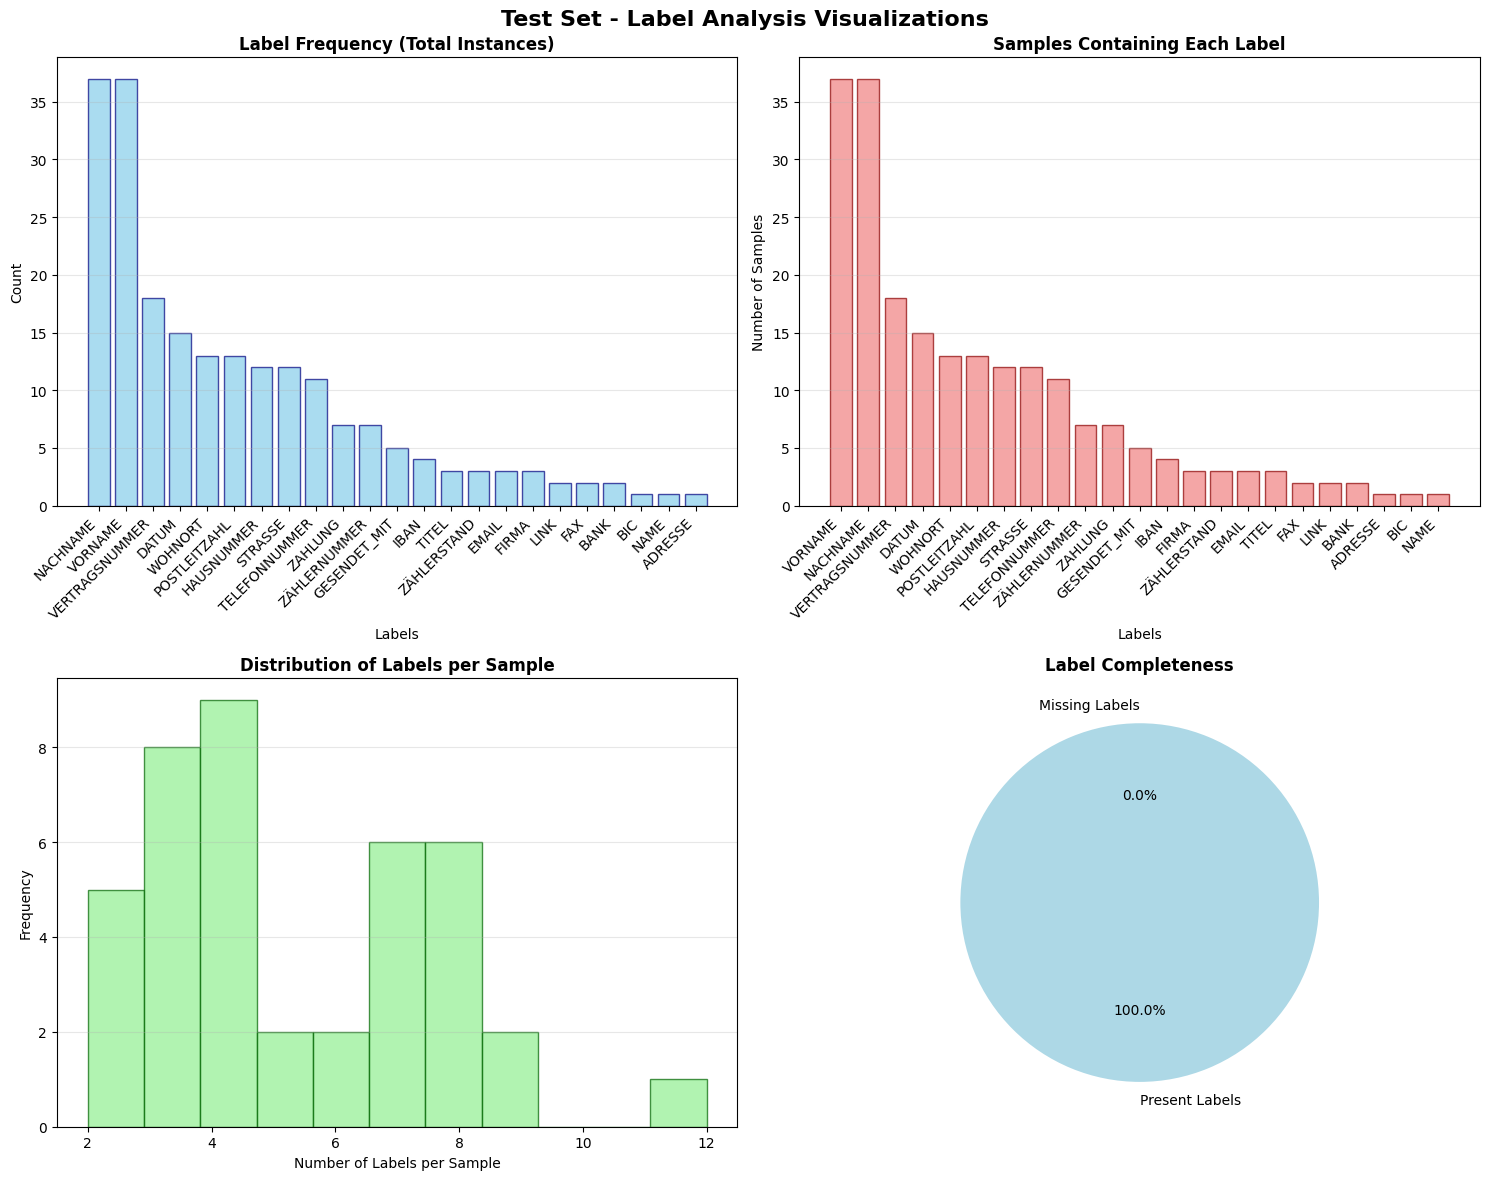


📋 DETAILED LABEL STATISTICS:
         Label  Status  Total_Instances  Samples_With_Label  Percentage_of_Samples
       VORNAME Present               37                  37                  90.24
      NACHNAME Present               37                  37                  90.24
VERTRAGSNUMMER Present               18                  18                  43.90
         DATUM Present               15                  15                  36.59
  POSTLEITZAHL Present               13                  13                  31.71
       WOHNORT Present               13                  13                  31.71
       STRASSE Present               12                  12                  29.27
    HAUSNUMMER Present               12                  12                  29.27
 TELEFONNUMMER Present               11                  11                  26.83
  ZÄHLERNUMMER Present                7                   7                  17.07
       ZAHLUNG Present                7                  

In [4]:
# Dataset Analysis Notebook
# Analyze label distribution and completeness in JSON datasets

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from typing import Dict, List, Set, Tuple

# Define the expected labels
PLACEHOLDERS = {
    "TITEL"         :  ["TITEL"],
    "VORNAME"       :  ["VORNAME"],
    "NACHNAME"      :  ["NACHNAME"],
    "FIRMA"         :  ["FIRMA"],
    "TELEFONNUMMER" :  ["TELEFONNUMMER"],
    "EMAIL"         :  ["EMAIL"],
    "FAX"           :  ["FAX"],
    "STRASSE"       :  ["STRASSE"],
    "HAUSNUMMER"    :  ["HAUSNUMMER"],
    "POSTLEITZAHL"  :  ["POSTLEITZAHL","PLZ","ZIP"],
    "WOHNORT"       :  ["WOHNORT","ORT","CITY"],
    "ZÄHLERNUMMER"  :  ["ZÄHLERNUMMER","METER_ID"],
    "ZÄHLERSTAND"   :  ["ZÄHLERSTAND","METER_READING"],
    "VERTRAGSNUMMER":  ["VERTRAGSNUMMER","ANGEBOTSNUMMER", "KUNDENNUMMER"],
    "ZAHLUNG"       :  ["BETRAG","ZAHLUNG","AMOUNT"],
    "BANK"          :  ["BANK"],
    "IBAN"          :  ["IBAN"],
    "BIC"           :  ["BIC"],
    "DATUM"         :  ["DATUM","DATE"],
    "GESENDET_MIT"  :  ["GESENDET_MIT"],
    "LINK"          :  ["LINK"]
}

# Get all expected labels as a set
EXPECTED_LABELS = set(PLACEHOLDERS.keys())

def load_dataset(file_path: str) -> List[Dict]:
    """Load JSON dataset from file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f"✓ Successfully loaded dataset from: {file_path}")
        return data
    except FileNotFoundError:
        print(f"❌ Error: File not found at {file_path}")
        return []
    except json.JSONDecodeError as e:
        print(f"❌ Error: Invalid JSON format - {e}")
        return []
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return []

def extract_labels_from_sample(sample: Dict) -> Set[str]:
    """Extract unique labels from a single sample."""
    return {label['label'] for label in sample.get('labels', [])}

def analyze_dataset(data: List[Dict]) -> Dict:
    """Perform comprehensive analysis of the dataset."""
    if not data:
        return {}

    # Basic statistics
    num_samples = len(data)

    # Extract all labels from all samples
    all_labels = []
    samples_with_labels = []

    for sample in data:
        sample_labels = extract_labels_from_sample(sample)
        all_labels.extend(sample_labels)
        samples_with_labels.append(sample_labels)

    # Count label occurrences
    label_counts = Counter(all_labels)
    unique_labels = set(all_labels)

    # Find missing labels
    missing_labels = EXPECTED_LABELS - unique_labels

    # Additional statistics
    total_label_instances = len(all_labels)
    samples_per_label = {label: sum(1 for s in samples_with_labels if label in s)
                        for label in unique_labels}

    # Labels per sample statistics
    labels_per_sample = [len(sample_labels) for sample_labels in samples_with_labels]

    return {
        'num_samples': num_samples,
        'unique_labels': unique_labels,
        'label_counts': label_counts,
        'missing_labels': missing_labels,
        'total_label_instances': total_label_instances,
        'samples_per_label': samples_per_label,
        'labels_per_sample': labels_per_sample
    }

def print_analysis_summary(analysis: Dict, dataset_name: str = "Dataset"):
    """Print a comprehensive summary of the analysis."""
    if not analysis:
        print("No analysis data available.")
        return

    print("=" * 60)
    print(f"📊 {dataset_name.upper()} ANALYSIS SUMMARY")
    print("=" * 60)

    # Basic statistics
    print(f"\n📈 BASIC STATISTICS:")
    print(f"  Total samples: {analysis['num_samples']}")
    print(f"  Total label instances: {analysis['total_label_instances']}")
    print(f"  Unique labels found: {len(analysis['unique_labels'])}")
    print(f"  Expected labels: {len(EXPECTED_LABELS)}")

    # Labels per sample statistics
    labels_per_sample = analysis['labels_per_sample']
    if labels_per_sample:
        print(f"  Average labels per sample: {sum(labels_per_sample) / len(labels_per_sample):.2f}")
        print(f"  Min labels per sample: {min(labels_per_sample)}")
        print(f"  Max labels per sample: {max(labels_per_sample)}")

    # Missing labels
    print(f"\n🔍 MISSING LABELS:")
    if analysis['missing_labels']:
        print(f"  Missing labels ({len(analysis['missing_labels'])}): {sorted(analysis['missing_labels'])}")
    else:
        print("  ✓ All expected labels are present!")

    # Label frequency analysis
    print(f"\n📊 LABEL FREQUENCY ANALYSIS:")
    label_counts = analysis['label_counts']
    sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

    print(f"  {'Label':<15} {'Count':<8} {'Samples':<8} {'%':<8}")
    print(f"  {'-'*15} {'-'*8} {'-'*8} {'-'*8}")

    for label, count in sorted_labels:
        samples_with_label = analysis['samples_per_label'][label]
        percentage = (samples_with_label / analysis['num_samples']) * 100
        print(f"  {label:<15} {count:<8} {samples_with_label:<8} {percentage:<8.1f}%")

def create_visualizations(analysis: Dict, dataset_name: str = "Dataset"):
    """Create visualizations for the dataset analysis."""
    if not analysis or not analysis['label_counts']:
        print("No data available for visualization.")
        return

    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'{dataset_name} - Label Analysis Visualizations', fontsize=16, fontweight='bold')

    # 1. Label frequency bar chart
    label_counts = analysis['label_counts']
    sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*sorted_labels)

    axes[0, 0].bar(range(len(labels)), counts, color='skyblue', edgecolor='navy', alpha=0.7)
    axes[0, 0].set_title('Label Frequency (Total Instances)', fontweight='bold')
    axes[0, 0].set_xlabel('Labels')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_xticks(range(len(labels)))
    axes[0, 0].set_xticklabels(labels, rotation=45, ha='right')
    axes[0, 0].grid(axis='y', alpha=0.3)

    # 2. Samples per label bar chart
    samples_per_label = analysis['samples_per_label']
    sorted_samples = sorted(samples_per_label.items(), key=lambda x: x[1], reverse=True)
    labels_spl, samples_spl = zip(*sorted_samples)

    axes[0, 1].bar(range(len(labels_spl)), samples_spl, color='lightcoral', edgecolor='darkred', alpha=0.7)
    axes[0, 1].set_title('Samples Containing Each Label', fontweight='bold')
    axes[0, 1].set_xlabel('Labels')
    axes[0, 1].set_ylabel('Number of Samples')
    axes[0, 1].set_xticks(range(len(labels_spl)))
    axes[0, 1].set_xticklabels(labels_spl, rotation=45, ha='right')
    axes[0, 1].grid(axis='y', alpha=0.3)

    # 3. Labels per sample distribution
    labels_per_sample = analysis['labels_per_sample']
    axes[1, 0].hist(labels_per_sample, bins=max(labels_per_sample)-min(labels_per_sample)+1,
                   color='lightgreen', edgecolor='darkgreen', alpha=0.7)
    axes[1, 0].set_title('Distribution of Labels per Sample', fontweight='bold')
    axes[1, 0].set_xlabel('Number of Labels per Sample')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(axis='y', alpha=0.3)

    # 4. Label completeness pie chart
    present_labels = len(analysis['unique_labels'])
    missing_labels = len(analysis['missing_labels'])

    labels_pie = ['Present Labels', 'Missing Labels']
    sizes = [present_labels, missing_labels]
    colors = ['lightblue', 'lightcoral']

    axes[1, 1].pie(sizes, labels=labels_pie, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Label Completeness', fontweight='bold')

    plt.tight_layout()
    plt.show()

def create_detailed_dataframe(analysis: Dict) -> pd.DataFrame:
    """Create a detailed DataFrame with label statistics."""
    if not analysis or not analysis['label_counts']:
        return pd.DataFrame()

    # Prepare data for DataFrame
    data_rows = []

    for label in EXPECTED_LABELS:
        if label in analysis['unique_labels']:
            count = analysis['label_counts'][label]
            samples = analysis['samples_per_label'][label]
            percentage = (samples / analysis['num_samples']) * 100
            status = 'Present'
        else:
            count = 0
            samples = 0
            percentage = 0.0
            status = 'Missing'

        data_rows.append({
            'Label': label,
            'Status': status,
            'Total_Instances': count,
            'Samples_With_Label': samples,
            'Percentage_of_Samples': round(percentage, 2)
        })

    df = pd.DataFrame(data_rows)
    return df.sort_values('Total_Instances', ascending=False)

# Main analysis function
def analyze_dataset_file(file_path: str, dataset_name: str = None):
    """Complete analysis workflow for a dataset file."""
    if dataset_name is None:
        dataset_name = file_path.split('/')[-1].replace('.json', '')

    print(f"🔍 Analyzing dataset: {dataset_name}")
    print(f"📁 File path: {file_path}")
    print("-" * 60)

    # Load dataset
    data = load_dataset(file_path)
    if not data:
        return None

    # Perform analysis
    analysis = analyze_dataset(data)

    # Print summary
    print_analysis_summary(analysis, dataset_name)

    # Create visualizations
    create_visualizations(analysis, dataset_name)

    # Create detailed DataFrame
    df = create_detailed_dataframe(analysis)
    print(f"\n📋 DETAILED LABEL STATISTICS:")
    print(df.to_string(index=False))

    return analysis, df

# Example usage:
if __name__ == "__main__":
    # Example: Analyze a dataset
    # Change this path to your dataset file
    # file_path = "./train.json"

    # Run the analysis
    # analysis, df = analyze_dataset_file(file_path, "Training Dataset")

    # You can also analyze multiple datasets:
    datasets = [
        ("./train.json", "Training Set"),
        ("./validation.json", "Validation Set"),
        ("./test.json", "Test Set")
    ]

    print("\n" + "="*80)
    print("📊 ANALYZING ALL DATASETS")
    print("="*80)

    for file_path, name in datasets:
        print(f"\n{'='*20} {name.upper()} {'='*20}")
        try:
            analysis, df = analyze_dataset_file(file_path, name)
        except Exception as e:
            print(f"❌ Error analyzing {name}: {e}")